In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from bigdatavqa.coreset import BFL2, BLK2, D2_sampling, Coreset

In [2]:
coreset_size = 10
number_of_corsets_to_evaluate = 15
number_of_sampling_for_centroids = 20

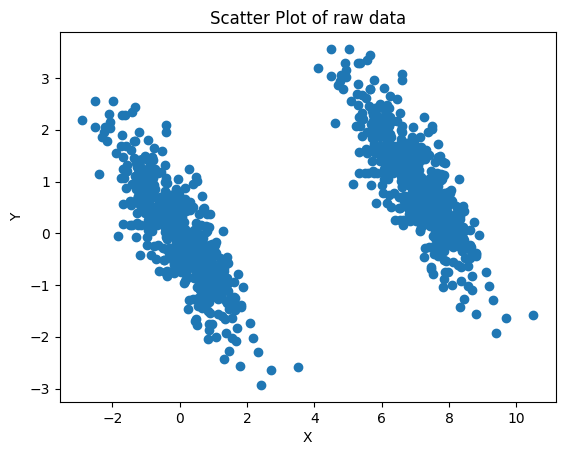

In [3]:
raw_data = Coreset.create_dataset(1000)
plt.scatter(raw_data[:, 0], raw_data[:, 1])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatter Plot of raw data")
plt.show()

Create coreset using BFL2 algorithm

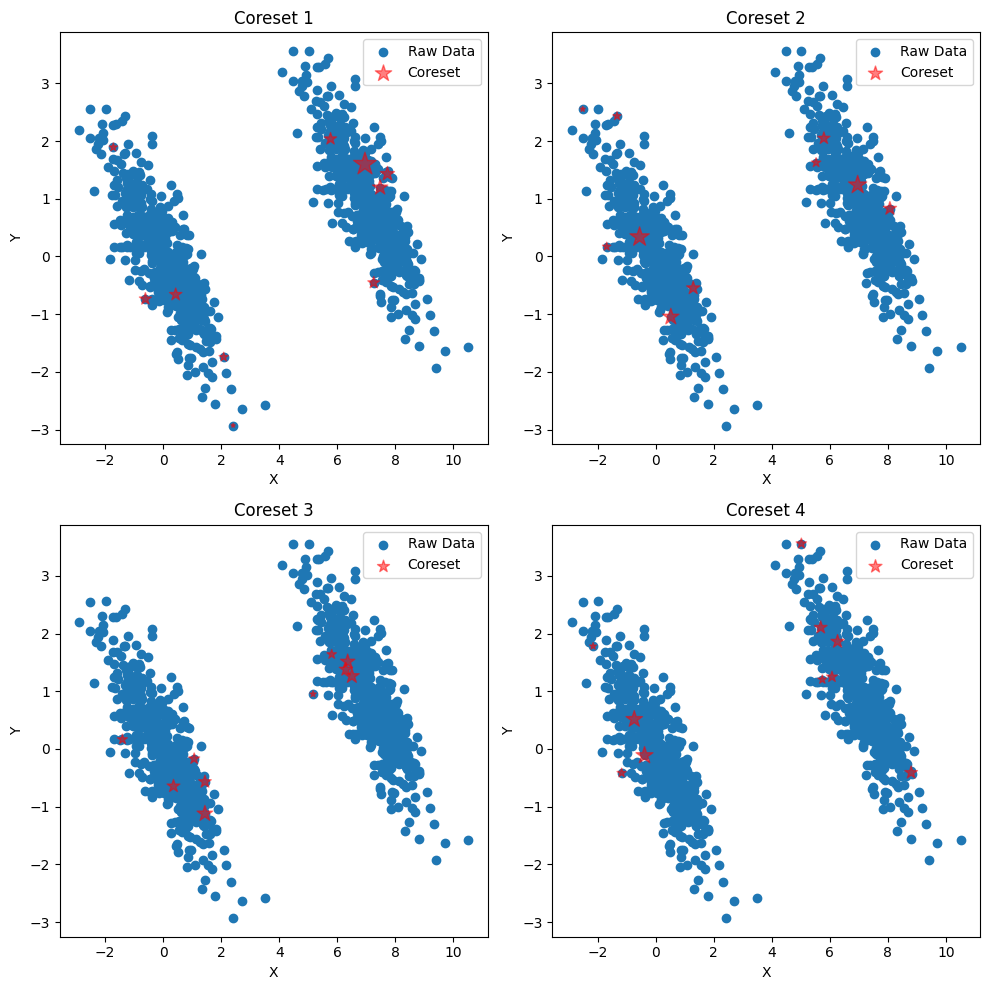

In [4]:
coreset = BFL2(
    raw_data=raw_data,
    number_of_sampling_for_centroids=10,
    coreset_size=10,
    number_of_coresets_to_evaluate=4,
    sampling_method=D2_sampling,
)

centroids = coreset.get_best_centroids()

coreset_vectors_list, coreset_weights_list = coreset._get_coresets(centroids)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, (coreset_vector, coreset_weights) in enumerate(
    zip(coreset_vectors_list, coreset_weights_list)
):
    df = pd.DataFrame(coreset_vector)
    df.columns = ["X", "Y"]
    df["Weights"] = coreset_weights

    ax = axs[i // 2, i % 2]
    ax.scatter(raw_data[:, 0], raw_data[:, 1], label="Raw Data")
    ax.scatter(df["X"], df["Y"], s=df["Weights"], label="Coreset", alpha=0.5, color="r", marker="*")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(f"Coreset {i+1}")
    ax.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

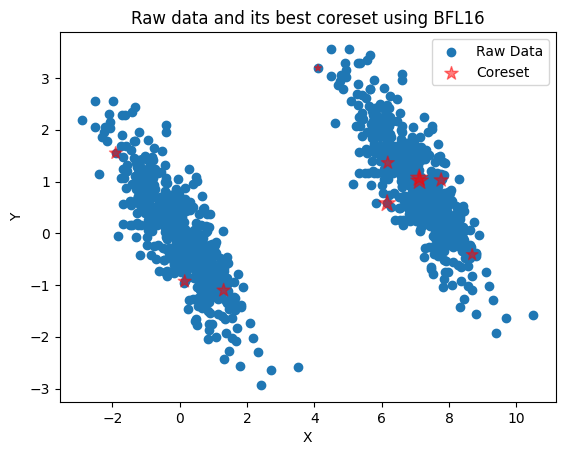

In [5]:
coreset.number_of_coresets_to_evaluate = 20
coreset_vectors, coreset_weights = coreset.get_best_coresets()
df = pd.DataFrame(
    {"X": coreset_vectors[:, 0], "Y": coreset_vectors[:, 1], "Weights": coreset_weights}
)
plt.scatter(raw_data[:, 0], raw_data[:, 1], label="Raw Data")
plt.scatter(df["X"], df["Y"], s=df["Weights"], label="Coreset", alpha=0.5, color="r", marker="*")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Raw data and its best coreset using BFL16")
plt.legend()
plt.show()

## Using Algorithm 2

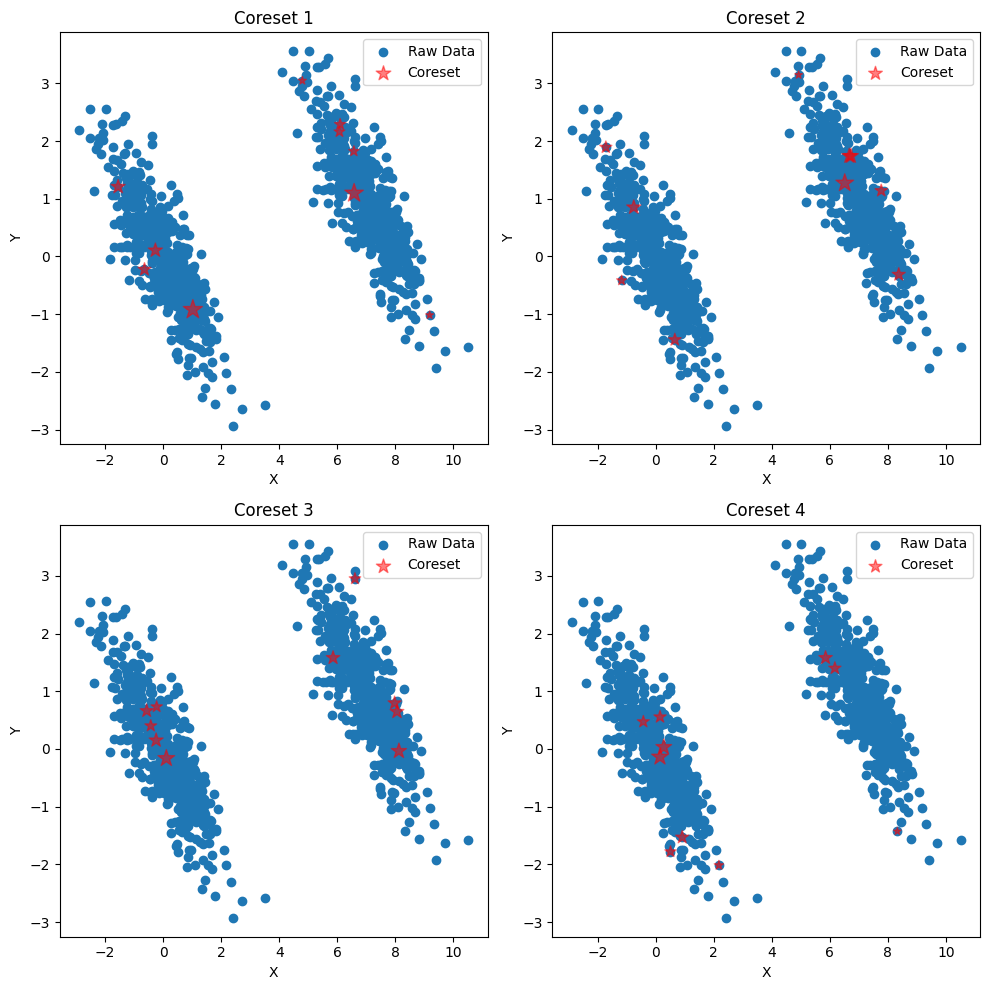

In [6]:
coreset = BLK2(
    raw_data=raw_data,
    number_of_sampling_for_centroids=10,
    coreset_size=10,
    number_of_coresets_to_evaluate=4,
    sampling_method=D2_sampling,
    k_value_for_BLK2=2,
)

centroids = coreset.get_best_centroids()

coreset_vectors_list, coreset_weights_list = coreset._get_coresets(centroids)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, (coreset_vector, coreset_weights) in enumerate(
    zip(coreset_vectors_list, coreset_weights_list)
):
    df = pd.DataFrame(coreset_vector)
    df.columns = ["X", "Y"]
    df["Weights"] = coreset_weights

    ax = axs[i // 2, i % 2]
    ax.scatter(raw_data[:, 0], raw_data[:, 1], label="Raw Data")
    ax.scatter(df["X"], df["Y"], s=df["Weights"], label="Coreset", alpha=0.5, color="r", marker="*")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_title(f"Coreset {i+1}")
    ax.legend()

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

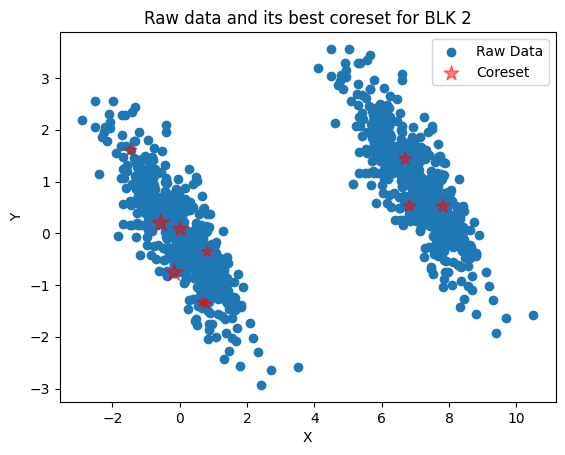

In [7]:
coreset.number_of_coresets_to_evaluate = 20
coreset_vectors, coreset_weights = coreset.get_best_coresets()

df = pd.DataFrame(
    {"X": coreset_vectors[:, 0], "Y": coreset_vectors[:, 1], "Weights": coreset_weights}
)
plt.scatter(raw_data[:, 0], raw_data[:, 1], label="Raw Data")
plt.scatter(df["X"], df["Y"], s=df["Weights"], label="Coreset", alpha=0.5, color="r", marker="*")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Raw data and its best coreset for BLK 2")
plt.legend()
plt.show()